In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
nfl_data = pd.read_csv("pass-2018.csv")
nfl_data

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD
0,Ben Roethlisberger\RoetBe00,PIT,36,QB,16,16,09/06/2001,452,675,67.0,...,320.6,96.5,73.0,24,166,7.10,7.04,3.4,2.0,3.0
1,Andrew Luck*\LuckAn00,IND,29,QB,16,16,10/06/2000,430,639,67.3,...,287.1,98.7,71.5,18,134,6.79,6.95,2.7,3.0,3.0
2,Matt Ryan\RyanMa00,ATL,33,QB,16,16,07/09/2000,422,608,69.4,...,307.8,108.1,70.6,42,296,7.12,7.71,6.5,1.0,1.0
3,Kirk Cousins\CousKi00,MIN,30,QB,16,16,08/07/2001,425,606,70.1,...,268.6,99.7,60.6,40,262,6.25,6.48,6.2,1.0,0.0
4,Aaron Rodgers*\RodgAa00,GNB,35,QB,16,16,06/09/2001,372,597,62.3,...,277.6,97.6,56.8,49,353,6.33,6.96,7.6,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Logan Thomas\ThomLo00,BUF,27,te,12,3,NaN,1,1,100.0,...,1.3,118.7,NaN,0,0,15.00,15.00,0.0,NaN,NaN
102,Colby Wadman\WadmCo00,DEN,23,P,12,0,NaN,1,1,100.0,...,1.0,116.7,NaN,0,0,12.00,12.00,0.0,NaN,NaN
103,Tress Way\WayxTr00,WAS,28,P,16,0,NaN,1,1,100.0,...,0.4,95.8,NaN,0,0,7.00,7.00,0.0,NaN,NaN
104,Dede Westbrook\WestDe00,JAX,25,WR,16,9,NaN,0,1,0.0,...,0.0,39.6,11.1,0,0,0.00,0.00,0.0,NaN,NaN


fun fact" in raw form the QBrec column data looks like this "09/06/01"  Those numbers signify that Rothlesburger (the top QB in the list) had a record of 9 wins, 6 losses, and 1 tie.  Somehow, that's being automatically converted into september 6th, 2001.  Dunno why.

In [3]:
X = nfl_data["Att"].values
y = nfl_data["Yds"].values
X, y

(array([675, 639, 608, 606, 597, 586, 580, 576, 570, 561, 555, 553, 526,
        508, 505, 489, 486, 471, 434, 427, 414, 403, 401, 393, 379, 378,
        365, 331, 328, 320, 274, 274, 246, 195, 178, 176, 170, 169, 131,
        110, 101,  91,  89,  85,  81,  80,  76,  70,  57,  54,  42,  35,
         31,  25,  23,  21,  17,  12,   7,   7,   6,   5,   4,   4,   4,
          3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
          1,   1]),
 array([5129, 4593, 4924, 4298, 4442, 3890, 5097, 4299, 4355, 4688, 3777,
        4049, 3885, 4308, 4165, 3992, 3725, 3395, 3223, 3448, 2865, 2718,
        3074, 2278, 2465, 2992, 2566, 2528, 2180, 2074, 2277, 1979, 2366,
        1413, 1247, 1003, 1201, 1252,  709,  539,  626,  590,  718,  473,
         296,  400,  515,  465,  320,  372,  187,  138,  266,  232,  118,
         174,   59,   43, 

In [4]:
X = X.reshape(-1,1)
y = y.reshape(-1,1)

X, y

(array([[675],
        [639],
        [608],
        [606],
        [597],
        [586],
        [580],
        [576],
        [570],
        [561],
        [555],
        [553],
        [526],
        [508],
        [505],
        [489],
        [486],
        [471],
        [434],
        [427],
        [414],
        [403],
        [401],
        [393],
        [379],
        [378],
        [365],
        [331],
        [328],
        [320],
        [274],
        [274],
        [246],
        [195],
        [178],
        [176],
        [170],
        [169],
        [131],
        [110],
        [101],
        [ 91],
        [ 89],
        [ 85],
        [ 81],
        [ 80],
        [ 76],
        [ 70],
        [ 57],
        [ 54],
        [ 42],
        [ 35],
        [ 31],
        [ 25],
        [ 23],
        [ 21],
        [ 17],
        [ 12],
        [  7],
        [  7],
        [  6],
        [  5],
        [  4],
        [  4],
        [  4],
        [  3],
        [ 

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=55)


In [6]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

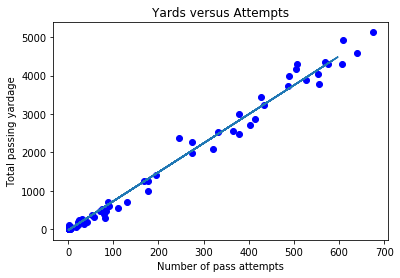

In [7]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_test,y_predict)
plt.xlabel("Number of pass attempts")
plt.ylabel("Total passing yardage")
plt.title("Yards versus Attempts")
plt.plot

In [8]:
min_100_attempts = nfl_data[nfl_data["Att"] > 100]

min_100_attempts


,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds.1,NY/A,ANY/A,Sk%,4QC,GWD
0,Ben Roethlisberger\RoetBe00,PIT,36,QB,16,16,09/06/2001,452,675,67.0,...,320.6,96.5,73.0,24,166,7.10,7.04,3.4,2.0,3.0
1,Andrew Luck*\LuckAn00,IND,29,QB,16,16,10/06/2000,430,639,67.3,...,287.1,98.7,71.5,18,134,6.79,6.95,2.7,3.0,3.0
2,Matt Ryan\RyanMa00,ATL,33,QB,16,16,07/09/2000,422,608,69.4,...,307.8,108.1,70.6,42,296,7.12,7.71,6.5,1.0,1.0
3,Kirk Cousins\CousKi00,MIN,30,QB,16,16,08/07/2001,425,606,70.1,...,268.6,99.7,60.6,40,262,6.25,6.48,6.2,1.0,0.0
4,Aaron Rodgers*\RodgAa00,GNB,35,QB,16,16,06/09/2001,372,597,62.3,...,277.6,97.6,56.8,49,353,6.33,6.96,7.6,3.0,3.0
5,Case Keenum\KeenCa00,DEN,30,QB,16,16,06/10/2000,365,586,62.3,...,243.1,81.2,47.9,34,235,5.90,5.39,5.5,3.0,4.0
6,Patrick Mahomes*+\MahoPa00,KAN,23,QB,16,16,12/04/2000,383,580,66.0,...,318.6,113.8,82.0,26,171,8.13,8.89,4.3,2.0,2.0
7,Eli Manning\MannEl00,NYG,37,QB,16,16,05/11/2000,380,576,66.0,...,268.7,92.4,51.2,47,358,6.33,6.21,7.5,1.0,2.0
8,Tom Brady*\BradTo00,NWE,41,QB,16,16,11/05/2000,375,570,65.8,...,272.2,97.7,68.8,21,147,7.12,7.26,3.6,1.0,2.0
9,Jared Goff*\GoffJa00,LAR,24,QB,16,16,13/03/2000,364,561,64.9,...,293.0,101.1,65.4,33,223,7.52,7.69,5.6,4.0,4.0


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

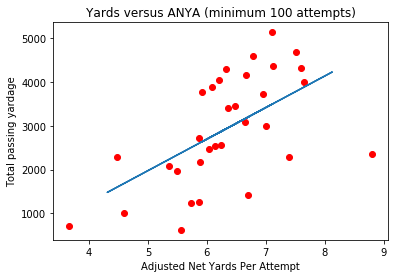

In [9]:
X = min_100_attempts["NY/A"].values
y = min_100_attempts["Yds"].values
X = X.reshape(-1,1)
y = y.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=55)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Adjusted Net Yards Per Attempt")
plt.ylabel("Total passing yardage")
plt.title("Yards versus ANYA (minimum 100 attempts)")
plt.plot

The correlation between ANYA and total passing yardage is pretty weak.

In [10]:
y = min_100_attempts["QBrec"].values
for i in range (y.size):
    if "/" in y[i]:
        y[i] = int(y[i].split("/")[0])
    else:
        y[i] = int(y[i].split("-")[0])






array(['09', '10', '07', '08', '06', '06', '12', '05', '11', '13', '06',
       '04', '10', '12', '11', '13', '06', '06', '11', '10', '04', '03',
       '05', '03', '04', '03', '04', '07', '06', '05', '03', '05', '02',
       '04', '02', '01', '06', 0, '02', 0, '02'], dtype=object)

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

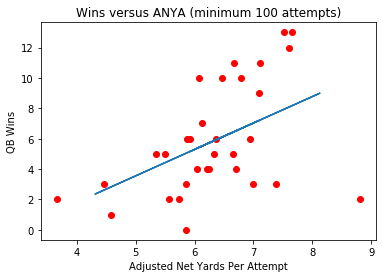

In [11]:
X = min_100_attempts["NY/A"].values
X = X.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=55)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_predict)
plt.xlabel("Adjusted Net Yards Per Attempt")
plt.ylabel("QB Wins")
plt.title("Wins versus ANYA (minimum 100 attempts)")
plt.plot

Whomever that is in the bottom right seems to be really wrecking my curve. I'm too lazy to dig into the raw data and find the culprit,  but I think I remember Ryan Fitzpatrick putting up a crazy good ANYA while going something like 2-4 last season.  My suspicion is that I didn't clean my data enough, and should have filtered by QBs with over 12 starts, rather than by ones with over 100 attempts.  However I find it interesting that virtually every QB with over 7 ANY/A ended up with a winning record, while literally every QB with an ANY/A below six finished with a losing one.  I'd like a lot more data before I say anything conclusively, but it sure does look like that's the line between success and failure, while QBs in the 6-7 range are all over the map.

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

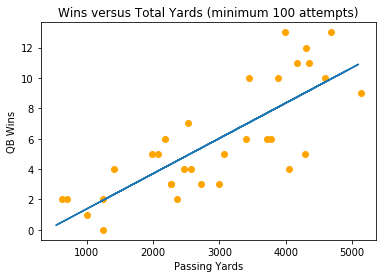

In [17]:
X = min_100_attempts["Yds"].values
X = X.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=55)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_predict = lm.predict(x_test)
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_test,y_predict)
plt.xlabel("Passing Yards")
plt.ylabel("QB Wins")
plt.title("Wins versus Total Yards (minimum 100 attempts)")
plt.plot

I was really suprised to see a cleaner correlation between total yards and wins than ANYA and wins.  The cleaness of this graph does (I think) strengthen my hypothesis that the earlier one is polluted by having QBs with excellent rate stats but an insufficient number of games to accumulate the corresponding number of wins.  (That problem disappears here since I'm comparing counting stats, rather than comparing a counting stat to a rate stat).  